# 实验 10 霍尔效应传感器和各向异性磁电阻传感器

> Author: [@Maxwell Jay](https://github.com/MaxwellJay256)
> 
> 使用前请先阅读 [README](./README.md)。

### 参考公式

#### 霍尔元件的灵敏度

$$
K_H = \frac{V_H}{I_s B}
$$

#### 载流直螺线管内部的磁感应强度

当螺线管“无限长”时，其内部的磁场强度为：
$$
B = \mu_0 n I_M
$$

#### 亥姆赫兹线圈公共轴线中点的磁感应强度

$$
B_0 = \frac{8 \mu_0 N I_M}{5 ^ {3/2} R}
$$

#### 各向异性磁阻传感器

传感器灵敏度定义式：
$$
s = \frac{V_{out}}{(V_s \cdot B)}
$$

### 实验仪器参数

**1. 载流直螺线管**
| 总长 | 线圈内径 | 外径 | 匝数 | 线径 |
| :--: | :------: | :--: | :--: | :--: |
| 300mm | 30mm | 42mm | 3200 | 0.6mm |

两端挡板厚 15mm。

**2. 亥姆赫兹线圈**
| 有效半径 | 匝数 | 线径 |
| :------: | :--: | :--: |
| 100mm | 310 | 0.6mm |


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as cnst
from scipy.stats import linregress
import csv

# 读取 csv 文件
def read_csv(filename):
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        data = list(reader)
    return data


## 1. 测量霍尔电压 $V_H$ 与磁感应强度 $B$ 的关系

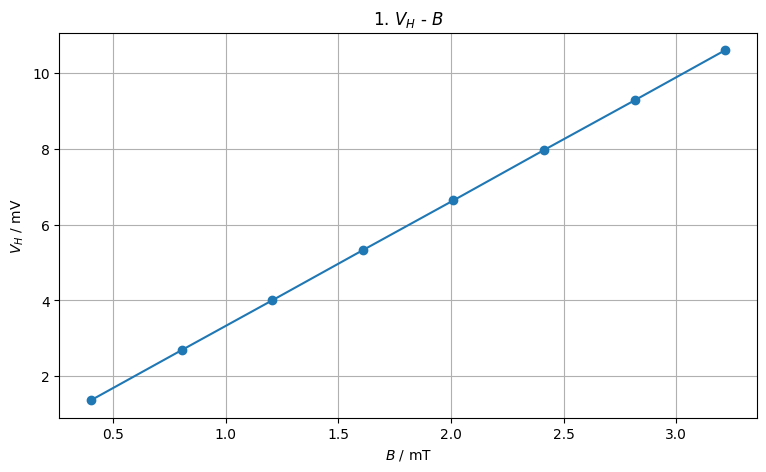

灵敏度 KH_1 = 0.6569144935339594 V/A/mT
相关系数 r = 0.9999994829370958


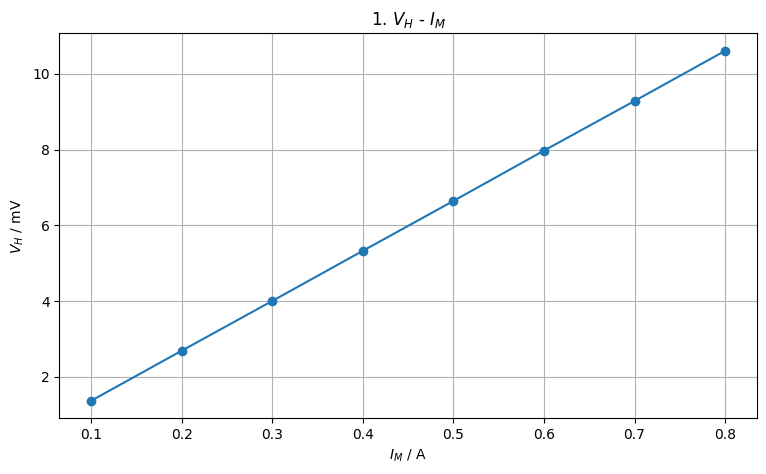

In [2]:

# 读取数据
data = read_csv('1-VH-IM.csv')
data = np.array(data[1:])
# 提取数据
IM = data[:, 0].astype(float) # A
VH = data[:, -1].astype(float) # mV

# 参数
n = 3200 # 匝数
IS = 5.000 # mA

# 计算磁感应强度
B = [] # mT
for i in range(len(IM)):
    B.append(round(cnst.mu_0 * n * IM[i] * 1000, 3))

# 将 B 写入 csv 文件的第 2 列，从第 2 行开始
with open('1-VH-IM.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    for i in range(len(B)):
        data[i+1][1] = B[i]
    with open('1-VH-IM.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(data)

# 画图
plt.figure(figsize=(9, 5))
plt.plot(B, VH, 'o-')
plt.ylabel('$V_H$ / mV')
plt.xlabel('$B$ / mT')
plt.title('1. $V_H$ - $B$')
plt.grid()
plt.savefig('1-VH-B.png', dpi=300)
plt.show()

# 使用最小二乘法计算灵敏度
slope, intercept, r_value, p_value, std_err = linregress(B, VH)
KH_1 = slope / IS
print('灵敏度 KH_1 =', KH_1, 'V/A/mT')
print('相关系数 r =', r_value)

# 再画一个 VH-IM
plt.figure(figsize=(9, 5))
plt.plot(IM, VH, 'o-')
plt.ylabel('$V_H$ / mV')
plt.xlabel('$I_M$ / A')
plt.title('1. $V_H$ - $I_M$')
plt.grid()
plt.savefig('1-VH-IM.png', dpi=300)
plt.show()



## 2. 测量霍尔电压 $V_H$ 与工作电流 $I_S$ 的关系

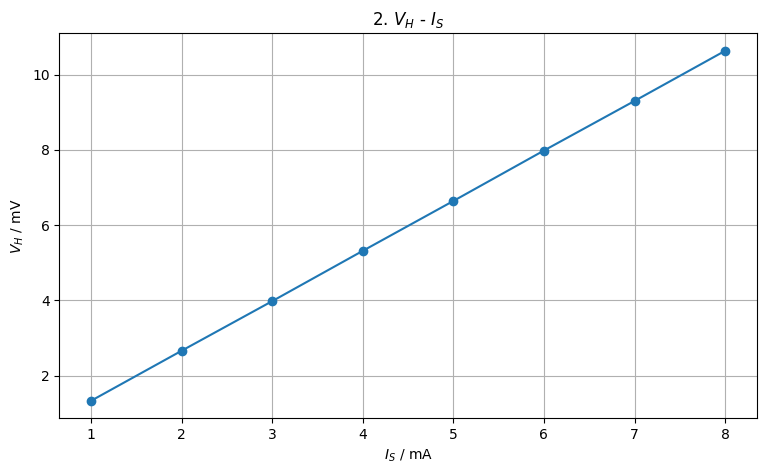

灵敏度 KH_2 = 0.660776443844569 V/A/mT
相关系数 r = 0.9999989581249134


In [3]:
# 读取数据
data = read_csv('2-VH-IS.csv')
data = np.array(data[1:])
# 提取数据
IS = data[:, 0].astype(float)
VH = data[:, -1].astype(float)

# 参数
IM = 0.500 # A
B = round(cnst.mu_0 * n * IM * 1000, 3) # mT

# 画图
plt.figure(figsize=(9, 5))
plt.plot(IS, VH, 'o-')
plt.ylabel('$V_H$ / mV')
plt.xlabel('$I_S$ / mA')
plt.title('2. $V_H$ - $I_S$')
plt.grid()
plt.savefig('2-VH-IS.png', dpi=300)
plt.show()

# 使用最小二乘法计算灵敏度
slope, intercept, r_value, p_value, std_err = linregress(IS, VH)
KH_2 = slope / B
print('灵敏度 KH_2 =', KH_2, 'V/A/mT')
print('相关系数 r =', r_value)

综合两次实验，得到霍尔元件的灵敏度 $K_H$：

In [4]:
KH = (KH_1 + KH_2) / 2 # V/A/mT
print('灵敏度 KH =', KH*1000, 'V/A/T')

灵敏度 KH = 658.8454686892642 V/A/T


## 3. 测量螺线管中磁感应强度 $B$ 的大小及分布情况

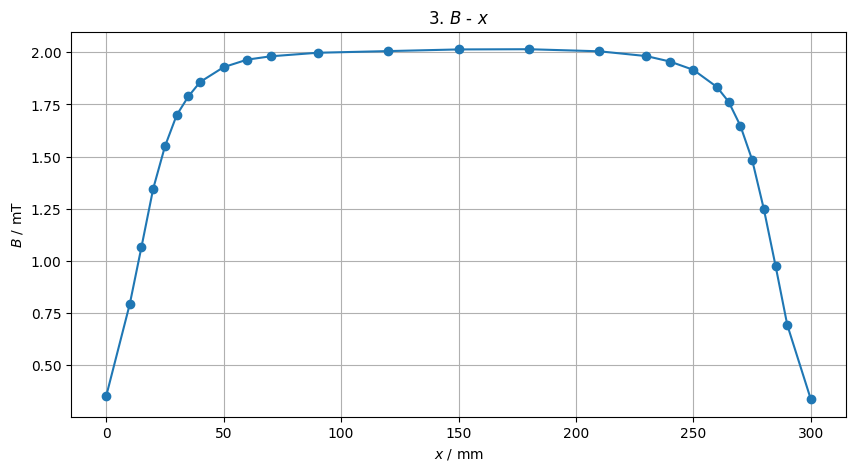

In [5]:
# 读取数据
data = read_csv('3-VH-X.csv')
data = np.array(data[1:])
# 提取数据
x = data[:, 0].astype(float) # mm
VH = data[:, -2].astype(float) # mV

# 参数
IM = 0.500 # A
IS = 5.000 # mA

# 计算各点磁感应强度
B = [] # mT
for i in range(len(x)):
    B.append(round(VH[i] / KH / IS, 3))

# 将 B 写入 csv 文件的最后一列，从第 2 行开始
with open('3-VH-X.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    for i in range(len(B)):
        data[i+1][-1] = B[i]
    with open('3-VH-X.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(data)

# 画图
plt.figure(figsize=(10, 5))
plt.plot(x, B, 'o-')
plt.ylabel('$B$ / mT')
plt.xlabel('$x$ / mm')
plt.title('3. $B$ - $x$')
plt.grid()
plt.savefig('3-B-x.png', dpi=300)
plt.show()


## 4. 各向异性磁阻传感器（AMR）特性

这部分实验中，B 的单位是 Gs，即高斯。Gs 与 T 的换算关系参考这篇文章：
[磁场强度单位和磁感应强度单位转换 - 知乎](https://zhuanlan.zhihu.com/p/645794431)

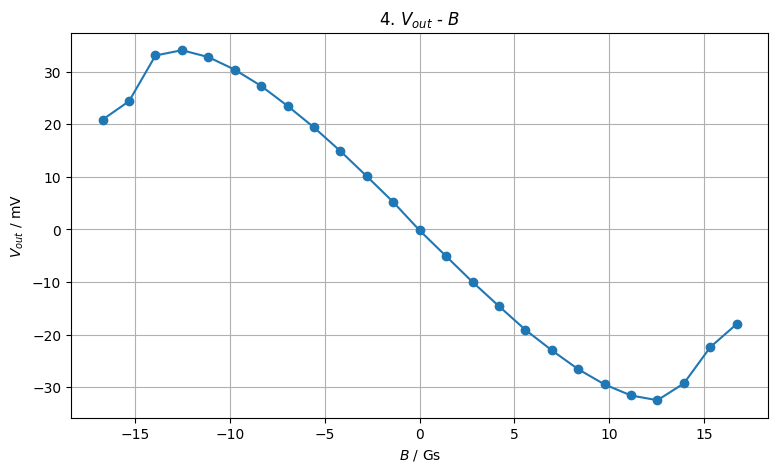

灵敏度 S_A = 0.87597 mV/V/Gs
相关系数 r = -0.9997957237757326


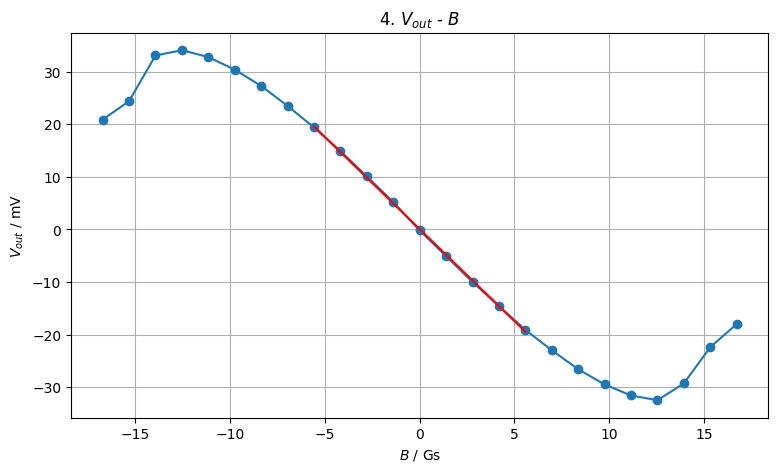

In [6]:
# 读取数据
data = read_csv('4-Vout-IM.csv')
data = np.array(data[1:])
# 提取数据
IM = data[:, 0].astype(float) # mA
Vout = data[:, -1].astype(float) # mV

# 参数
N = 310 # 匝数
R = 0.100 # m
f = lambda N, IM, R: round(10 * 8 * cnst.mu_0 * N * IM / pow(5, 1.5) / R, 3) # 磁场强度表达式
VS = 4.000 # V

# 计算磁场强度
B = [] # Gs
for i in range(len(IM)):
    B.append(round(f(N, IM[i], R), 3))

# 将 B 写入 csv 文件的第 2 列，从第 2 行开始
with open('4-Vout-IM.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)
    for i in range(len(B)):
        data[i+1][1] = B[i]
    with open('4-Vout-IM.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(data)

# 画 Vout-B 关系曲线
plt.figure(figsize=(9, 5))
plt.plot(B, Vout, 'o-')
plt.ylabel('$V_{out}$ / mV')
plt.xlabel('$B$ / Gs')
plt.title('4. $V_{out}$ - $B$')
plt.grid()
plt.savefig('4-Vout-B.png', dpi=300)
plt.show()

# 选取中间接近线性的部分（B 在 ±6Gs 内），线性回归并计算灵敏度
B_linear = np.array(B[8: 17])
Vout_linear = np.array(Vout[8: 17])
slope, intercept, r_value, p_value, std_err = linregress(B_linear, Vout_linear)
SA = abs(slope) / VS # mV/V/Gs
print('灵敏度 S_A =', round(SA, 5), 'mV/V/Gs')
print('相关系数 r =', r_value)

# 在上一个图中添加拟合直线
plt.figure(figsize=(9, 5))
plt.plot(B, Vout, 'o-')
plt.plot(B_linear, slope * B_linear + intercept, 'r-')
plt.ylabel('$V_{out}$ / mV')
plt.xlabel('$B$ / Gs')
plt.title('4. $V_{out}$ - $B$')
plt.grid()
plt.savefig('4-Vout-B_linregress.png', dpi=300)
plt.show()

## 5. 各向异性磁阻传感器（AMR）输出电压与角度之间的关系

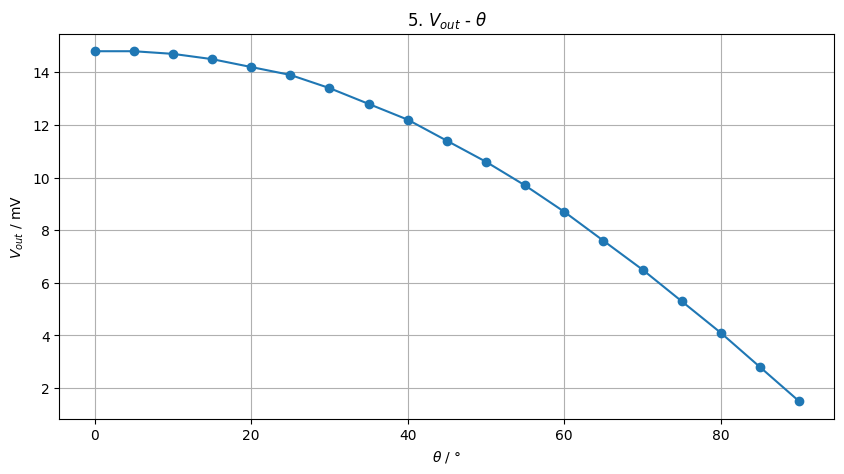

In [7]:
# 读取数据
data = read_csv('5-Vout-theta.csv')
data = np.array(data[1:])
# 提取数据
theta = data[:, 0].astype(float) # °
Vout = data[:, 1].astype(float) # mV

# 画 Vout-theta 关系曲线
plt.figure(figsize=(10, 5))
plt.plot(theta, Vout, 'o-')
plt.ylabel('$V_{out}$ / mV')
plt.xlabel('$\\theta$ / °')
plt.title('5. $V_{out}$ - $\\theta$')
plt.grid()
plt.savefig('5-Vout-theta.png', dpi=300)
plt.show()


## 思考题

- 估算本实验所用霍尔片的载流子浓度。

$K_H = \frac{1}{n e d}$，所以 $n = \frac{1}{K_H e d}$。

In [8]:
# 参数
d = 1 # mm
n = 1 / (KH * cnst.e * d) # KH 需转换成 V/A/T，而 d 需转换成 m，正好抵消
print('载流子浓度 n =', n, 'm^-3')

载流子浓度 n = 9.473403660008305e+18 m^-3
